<a href="https://colab.research.google.com/github/Lanxin-Xiang/is765/blob/main/W2_Neural_Network_Refresher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W2. Refresher on Neural Networks <a name="nn"></a>

## Feedforward Neural Network Architecture <a name="nn_basic"></a>

Feedforward neural networks (a.k.a. multilayer perceptron) are the most basic neural network architecture. This part offers a brief review of its key components, training strategy, and implementation using `keras`. Understanding of feedforward neural networks will be important for more advanced topics (e.g. recurrent neural networks).

### Layers <a name="nn_basic_layers"></a>

A feedforward neural network consists of multiple **layers** connected one after another. Here is what a fully-connected feedforward neural network with three layers looks like.

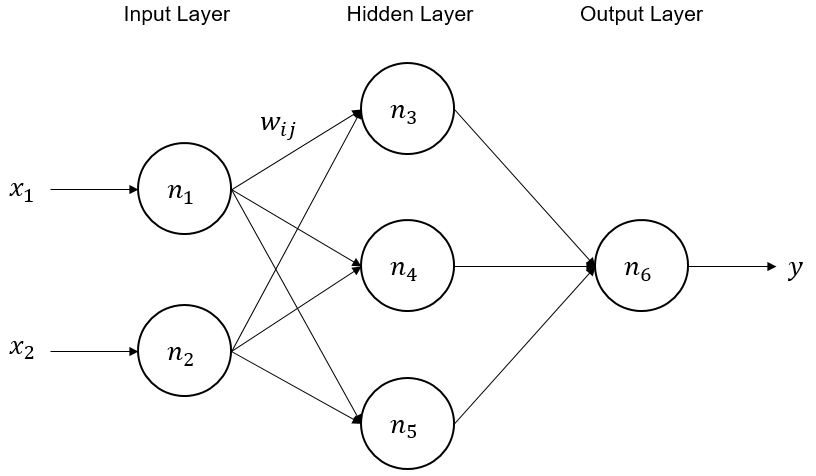

Typically, a feedforward neural network has 1 input layer, 1 or more hidden layers in the middle, and 1 output layer. Each layer can contain one or more **neurons** (in the above case, there are 2, 3, 1 neurons in each of the three layers). Neurons in different layers have different roles:
- Neurons in the input layer typically takes the inputs and pass them on to subsequent layers;
- Neurons in the hidden layer **aggregates** information from the previous layer, apply some form of **transformation**, then pass on the resulting information;
- Neurons in the output layer **aggregates** information from the previous layer, apply some form of **transformation**, then output the results (i.e., predictions).

<font color="blue">Intuition of a feedforward neural network</font>: takes input information, aggregates and transforms them in various different ways and steps, and finally produces some predictions.

### Weights <a name="nn_basic_weights"></a>

Weights in a neural network describe **how information from a previous layer is aggregated**. In a fully-connected feedforward neural network, there is a weight $w_{ij}$ between neurons $i$ and $j$ of two consecutive layers.

Take neuron $n_3$ in the above figure as an example. It is connected with both input neurons, and will receive $w_{13}x_1 + w_{23}x_2$ as its input.

### Activation Functions <a name="nn_basic_activation"></a>

A neuron doesn't just pass on the input it receives - it also transform it using a so called **activation function $f(.)$**. Neurons in different layers often use different activation functions (to achieve different purposes):
- Activation functions in the **input layer** is typically just an identity function (i.e., pass on what you receive, no actual transformation);
- Activation functions in the **hidden layer** is typically some kind of nonlinear continuous function;
- Activation functions in the **output layer** also tend to be certain nonlinear continuous function, but the choice is often determined by the desired type of output (e.g., predicted probabilities in classification tasks and real values in numeric prediction tasks).

<font color="red">Question: why do we need activation function? Why can't each neuron simply passes on the (aggregated) information it receives?</font>

**Common choices of activation functions and their characteristics**:
1. Identity function:
$$f(x) = x$$
    - Often used in input layer, passes on the information it receives without any actual transformation.

2. Rectified Linear Unit (ReLU):
$$f(x) = \max\{x, 0\}$$
    - Often used in hidden layers, passes on the information it receives as long as it is positive; otherwise pass on 0.
    - Motivated by the biological neurons in our brain. It "fires" a signal to other connected neurons when the signal it receives is strong enough.

3. Sigmoid function (logistic function):
$$f(x) = \frac{1}{1 + e^{-x}}$$
    - Often used in the output layer for a binary classification task, because the output of a sigmoid function is always between 0 and 1, which is suitable to represent a probability.
    - It also has a very nice mathematical property: $f'(x) = f(x)(1-f(x))$. In other words, one can compute the derivative of a sigmoid function very easily.

4. Softmax:
$$f(x_1, x_2, \ldots, x_k) = \left[ \frac{e^{x_1}}{\sum_{i = 1}^{k} e^{x_i}}, \frac{e^{x_2}}{\sum_{i = 1}^{k} e^{x_i}}, \ldots, \frac{e^{x_k}}{\sum_{i = 1}^{k} e^{x_i}} \right]$$
    - Often used in the output layer for a $k$-class classification task. This is a straightforward generalization of the sigmoid function to multiple dimensions.
    - The output conveniently represents the probability of belonging to each of the $k$ classes.
    
5. Hyperbolic tangent:
$$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \doteq \tanh(x)$$
    - Often used in the hidden layers, especially in deep networks when there are a large number of hidden layers.
    - Like sigmoid, it also has a nice property regarding derivative: $f'(x) = 1 - f^2(x)$.
    - Its output is always between -1 and 1. Therefore, it helps prevent the information being "blown up" over many hidden layers.

### A neural network example with tensorflow and keras


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

This model consists of a sequence of **2 Dense Layers**, and the second layer will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current sample belongs to one of 10 classes.


## Training Neural Networks <a name="nn_train"></a>

How to train a neural network using (labeled) data? I.e., how do we learn the weights in the network $\{w_{ij}\}$ from data? How to do it with Python?

### Data representations for neural network-tensor

#### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

#### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

In [ ]:
x.ndim

#### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

#### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

#### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.ndim

In [ ]:
train_images.shape

In [ ]:
train_images.dtype

**Displaying the fourth digit**

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_labels[4]

### Slicing tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### The engine of neural network: Gradient-Based Optimization

#### Objective Function <a name="nn_train_objective"></a>

Like many other machine learning models (e.g., linear regression), neural network is trained by optimizing certain **objective function**. An objective function is essentially a goodness-of-fit metric - it describes how well a model fits a given set of data. Therefore, training a neural network is a process of optimizing some well-defined objective function, in order to fit the model to the training data.

<font color="blue">This should not be confused with _performance metrics_ that we use to evaluate or fine-tune neural networks (e.g., accuracy, precision/recall, RMSE...)</font>

For data instance $i \in \{1, \ldots, N\}$, denote the matrix of input data as $\boldsymbol{X_i}$ and the neural network's predictions as $\widehat{y_i}$, we can write $\widehat{y_i} = F(\boldsymbol{X_i}; \boldsymbol{W})$, where $\boldsymbol{W}$ are the weights to be learned and $F(.)$ is some complex function that links input to output via weights and activations. **Here are some common choices of objective function $L(\widehat{y}, y)$**:

1. Quadratic loss:
$$L(\widehat{y}, y) = \frac{1}{2} \sum_{i=1}^{N} (\widehat{y_i} - y_i)^2$$
    - Often used for numeric prediction tasks. This is the same as OLS;
    - The constant 1/2 is there only for mathematical convenience;
    - <font color="red">Question: Why do we take square of the errors $\widehat{y_i} - y_i$, rather than just summing over the errors or the absolute errors?</font>

2. (Binary) Cross-Entropy loss:
$$L(\widehat{y}, y) = - \sum_{i=1}^{N} (y_i\log(\widehat{y_i}) + (1-y_i)\log(1-\widehat{y_i}))$$
    - Often used for binary classification tasks. This is the same as the log likelihood of a logit regression objective function;
    - Note that here $y_i \in \{0,1\}$ and $\widehat{y_i}$ is a predicted probability;
    - <font color="blue">Intuition: </font> $L(\widehat{y}, y)$ is smaller if $\widehat{y_i}$ is closer to 1 when $y_i = 1$ and closer to 0 when $y_i = 0$.

3. (Categorical) Cross-Entropy loss:
$$L(\widehat{y}, y) = - \sum_{i=1}^{N} \sum_{j=1}^{k} y_{ij}\log(\widehat{y_{ij}})$$
    - Often used for $k$-class classification tasks. This is a direct generalization of binary cross-entropy;
    - Notationally, $y_{ik}$ is a binary indicator of whether data point $i$ belongs to class $j$ or not (i.e., one-hot encoded), and $\widehat{y_{ij}}$ is the model's predicted probability that data point $i$ belongs to class $j$.
    - <font color="blue">Intuition: </font> $L(\widehat{y}, y)$ is smaller when the predicted probability is high for the correct class.

<font color="blue">Note that all of the above objective functions are formulated as "losses", i.e., smaller value indicates better fit.</font> This is why we often call them as **loss functions** and we want to **minimize the loss functions**. More formally, training a neural network amounts to solving the following minimization problem:

$$\mbox{Find weights } \boldsymbol{W} \mbox{ such that } L(\widehat{y}, y) \mbox{ is minimized.}$$

### Gradient Descent <a name="nn_train_gradient"></a>

So, given a set of data and a well-defined loss function to be minimized. How do we actually minimize it? This is where **training algorithms** come into play. There are a large number of training algorithms developed in the optimization research. One of the most classic is **gradient descent**.

<font color="blue">Intuition of how gradient descent works: </font> Move in the _opposite direction_ of the gradient, by a certain distance.

- Gradient descent works because the opposite of the gradient gives the most effective direction to reduce value of a function;
- The distance to move is obviously important. Move too little, then it may take a long time to reach the minimum. Move to much, you may "go pass" the minimum. The distance is partially controlled by _step size_ or _learning rate_, which is a hyper-parameter to be set by the user and fine-tuned;
- Intuitively, it makes sense to dynamically change the learning rate. For example, maybe start with a large learning rate, then gradually decrease it. This is the idea behind _adaptive learning rates_.

There are a large number of other optimization algorithms, many building on the basic gradient descent, such as momentum, Adam, Adagrad, RMSprop, ... Check out "Additional Resources" for details if you are interested.

Finally, for general guidelines on how to fine-tune a neural network model. I highly recommend this GitHub repo: [Deep Learning Tuning Playbook](https://github.com/google-research/tuning_playbook)

### Batch, Epoch, and Stochastic Gradient Descent <a name="nn_train_sgd"></a>

**The problem with basic gradient descent discussed above**: In principle, you can perform gradient descent on the entire set of training data (for multiple iterations) until it's done. However, this can be computationally very expensive in practice especially if the size of training data is very large, because calculating the gradient of loss function $L(\widehat{y}, y)$ involves calculating the gradients associated with each data point then add them up.

**The solution - stochastic gradient descent**: don't using all the training data every time you want to calculate a gradient. Instead, use a subset of it each time, called a **batch** of training data points, to calculate gradient. For instance, if you have 100 training data points and adopt a batch size of 20, then you can perform 5 gradient descent iterations (i.e., parameter updates) during one scan pass of the training dataset. Finally, you can scan pass the same training dataset multiple times during the entire process of gradient descent. Each time you scan through the training dataset is called an **epoch**.

<font color="blue">Note:</font> sometimes, people refer to stochastic gradient descent specifically as the version where every time you only use a single data point to calculate gradient and perform update (i.e., set batch size to 1), and refer to the case described above as **mini-batch gradient descent** (i.e., set batch size somewhere between 1 and total training data size). These are mostly terminology differences.

TensorFlow provide us a useful api - `GradientTape` to record the tensor operation in a form of a computation graph (also called a `tape`). Here is a demo code of how to record gradient and upgrade weights:

In [ ]:
import tensorflow as tf

In [ ]:
def update_weights(gradients, weights, learning_rate):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(grad_of_y_wrt_W_and_b)

update_weights(grad_of_y_wrt_W_and_b, [W, b], 0.05)
print(W, b)

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.0130281, 1.0130281],
       [1.5429741, 1.5429741]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.67886543, 0.23022392],
       [0.7331438 , 0.05120108]], dtype=float32)> <tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([-0.1, -0.1], dtype=float32)>


### Model Compilation, Training and Monitoring

Prepare some toy data first.

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

Data distribution

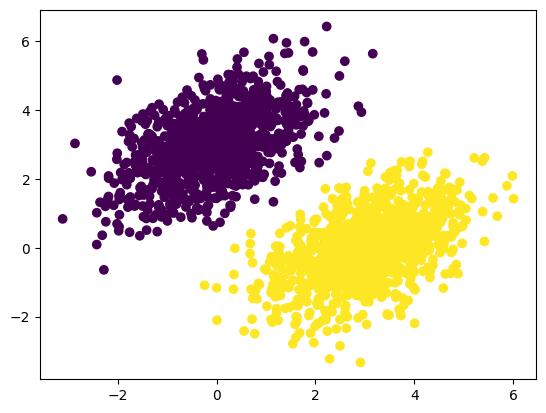

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.0844 - binary_accuracy: 0.9457 - val_loss: 0.1668 - val_binary_accuracy: 0.8900
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0717 - binary_accuracy: 0.9564 - val_loss: 0.2273 - val_binary_accuracy: 0.6500
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0718 - binary_accuracy: 0.9529 - val_loss: 0.1351 - val_binary_accuracy: 0.9417
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0677 - binary_accuracy: 0.9600 - val_loss: 0.1816 - val_binary_accuracy: 0.6267
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0718 - binary_accuracy: 0.9571 - val_loss: 0.0532 - val_binary_accuracy: 1.0000


In [ ]:
# Use model after training
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 2ms/step
[[0.24932253]
 [1.125309  ]
 [0.20854783]
 [1.5072099 ]
 [0.12988445]
 [1.4755359 ]
 [0.02426034]
 [1.3819273 ]
 [1.1506495 ]
 [1.3039541 ]]


## Underfitting and Overfitting

Underfit

At the beginning of training, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, your model is said to be **underfit**: there is still progress to be made; the network hasn’t yet modeled all relevant patterns in the training data. At this moment, the model has a high bias.

Overfit

But after a certain number of iterations on the training data, generalization stops improving, validation metrics stall and then begin to degrade: the model is starting to **overfit**. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data. The model now turns to have a high bias. Overfitting is particularly likely to occur when your data is noisy, if it involves uncertainty, or if it includes rare features.

### Cope with underfitting and overfitting

1. Why underfit
 - Data quality: lack of training data or the data is too noisy
 - The model is too simple

2. To tackle underfitting
 - Increase the number of features in the dataset
 - Increase model complexity
 - Reduce noise in the data
 - Increase the duration of training the data

3. Why overfit
 - Data quality: lack of training data or the data is too noisy
 - The model is too complex

4. To tackle overfitting
 - Regularization
 - Feature selection
 - K-fold cross-validation
 - Early stopping
 - Data augmentation
 - …

### Regularization

Regularization techniques are a set of best practices that actively impede the model's ability to fit perfectly to the training data, with the goal of making the model perform better during validation. This is calle **“regularizing”** the model, because it tends to make the model simpler, more “regular,” its curve smoother, more “generic”; <font color="blue">thus it is less specific to the training set and better able to generalize by more closely approximating the latent manifold of the data.<font>

Regularization includes:
1. Reducing the network's size
2. Weighted regularization (L1, L2)
 - L1 regularization (the L1 norm of the weights)
    
    The cost added is proportional to the absolute value of the weight coefficients

 - L2 regularization (the L2 norm of the weights)

    The cost added is proportional to the square of the value of the weight coefficients. L2 regularization is also called weight decay in the context of neural networks.

 - Example: L2
$$ J(\theta)=-\sum_{i=1}^N\sum_{j=1}^ky_{ij}log(\hat{y_{ij}})+\lambda\sum_l\theta_l^2 $$

3. Add dropout
  
  Dropout is one of the most effective and most commonly used regularization techniques for neural networks. Dropout applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training.
  
  Let's say a given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it's usually set between 0.2 and 0.5.

Let's try some regularization examples.

#### The original model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5214 - accuracy: 0.7834 - val_loss: 0.3914 - val_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3251 - accuracy: 0.8913 - val_loss: 0.3094 - val_accuracy: 0.8855
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2436 - accuracy: 0.9171 - val_loss: 0.2880 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1963 - accuracy: 0.9332 - val_loss: 0.3087 - val_accuracy: 0.8745
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1657 - accuracy: 0.9463 - val_loss: 0.2782 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1404 - accuracy: 0.9551 - val_loss: 0.2869 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1226 - accuracy: 0.9603 - val_loss: 0.2989 - val_accuracy: 0.8845
Epoch 8/20
30

#### 1. How does complexity affect the model

**Model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.6439 - accuracy: 0.6048 - val_loss: 0.6044 - val_accuracy: 0.6697
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5707 - accuracy: 0.7467 - val_loss: 0.5566 - val_accuracy: 0.7637
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5213 - accuracy: 0.8178 - val_loss: 0.5245 - val_accuracy: 0.8530
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4829 - accuracy: 0.8605 - val_loss: 0.4957 - val_accuracy: 0.8310
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.4496 - accuracy: 0.8836 - val_loss: 0.4734 - val_accuracy: 0.8697
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4207 - accuracy: 0.9009 - val_loss: 0.4546 - val_accuracy: 0.8745
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3936 - accuracy: 0.9165 - val_loss: 0.4367 - val_accuracy: 0.8756
Epoch 8/20
30

**Model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 14s 340ms/step - loss: 0.5609 - accuracy: 0.7218 - val_loss: 0.6112 - val_accuracy: 0.6905
Epoch 2/20
30/30 [==============================] - 14s 460ms/step - loss: 0.3271 - accuracy: 0.8642 - val_loss: 0.3011 - val_accuracy: 0.8772
Epoch 3/20
30/30 [==============================] - 11s 365ms/step - loss: 0.2343 - accuracy: 0.9094 - val_loss: 0.3450 - val_accuracy: 0.8594
Epoch 4/20
30/30 [==============================] - 10s 353ms/step - loss: 0.1851 - accuracy: 0.9313 - val_loss: 0.3924 - val_accuracy: 0.8547
Epoch 5/20
30/30 [==============================] - 13s 447ms/step - loss: 0.1489 - accuracy: 0.9414 - val_loss: 0.3391 - val_accuracy: 0.8638
Epoch 6/20
30/30 [==============================] - 14s 473ms/step - loss: 0.1068 - accuracy: 0.9615 - val_loss: 0.3094 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 11s 377ms/step - loss: 0.0757 - accuracy: 0.9753 - val_loss: 0.3916 - val_accuracy: 0.8772

#### 2. Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.6368 - accuracy: 0.7632 - val_loss: 0.5033 - val_accuracy: 0.8581
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4254 - accuracy: 0.8887 - val_loss: 0.3991 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 0.3433 - accuracy: 0.9097 - val_loss: 0.3734 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 2s 63ms/step - loss: 0.3008 - accuracy: 0.9229 - val_loss: 0.3850 - val_accuracy: 0.8745
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2781 - accuracy: 0.9329 - val_loss: 0.3596 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2620 - accuracy: 0.9371 - val_loss: 0.3922 - val_accuracy: 0.8740
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2509 - accuracy: 0.9421 - val_loss: 0.3690 - val_accuracy: 0.8831
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 3. Adding dropout


**Add dropout to the original model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6531 - accuracy: 0.6013 - val_loss: 0.5544 - val_accuracy: 0.8352
Epoch 2/20
30/30 [==============================] - 2s 63ms/step - loss: 0.5618 - accuracy: 0.7132 - val_loss: 0.4529 - val_accuracy: 0.8663
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.4809 - accuracy: 0.7845 - val_loss: 0.3804 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4112 - accuracy: 0.8305 - val_loss: 0.3338 - val_accuracy: 0.8786
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3558 - accuracy: 0.8635 - val_loss: 0.3033 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3084 - accuracy: 0.8869 - val_loss: 0.2822 - val_accuracy: 0.8901
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2759 - accuracy: 0.9028 - val_loss: 0.2732 - val_accuracy: 0.8923
Epoch 8/20
30

## Build Neural Networks with Keras on Iris dataset <a name="nn_implementation"></a>

Let's try some examples. For demonstration, I will implement a feedforward neural network for classification using the classic [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/is765

/content/drive/MyDrive/is765


In [ ]:
# Import packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
# Read in the dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# convert feature lists to a numpy array
x = np.array(iris_df.drop("species", axis=1), dtype = float)
# one-hot encode the label (3 classes) - a manual approach
label = np.zeros((iris_df.shape[0], 3))
for i in range(iris_df.shape[0]):
    if iris_df['species'][i] == 'setosa':
        label[i][0] = 1
    elif iris_df['species'][i] == 'versicolor':
        label[i][1] = 1
    elif iris_df['species'][i] == 'virginica':
        label[i][2] = 1
label = np.array(label, dtype = float)

# training-validation split (70% training)
x_train, x_val, label_train, label_val = train_test_split(x, label, test_size = 0.3)
print(x_train.shape, x_val.shape, label_train.shape, label_val.shape)

(105, 4) (45, 4) (105, 3) (45, 3)


In [ ]:
# Now, let's specify the neural network structure using the Sequential class of Keras
model_nn = keras.Sequential()
# First, add the input layer, specify the shape of input (a feature vector of 4 elements)
model_nn.add(keras.layers.InputLayer(input_shape = (4,)))
# Second, add the hidden layers (as many as you'd like, I'm only adding 1 hidden layer here for demonstration)
# I'm adding 8 neurons in this layer, with ReLU activation
model_nn.add(keras.layers.Dense(units = 8, activation = 'relu'))
# Finally, specify the output layer - must have 3 units here because there are 3 classes to predict
model_nn.add(keras.layers.Dense(units = 3, activation = 'softmax'))

In [ ]:
# Next, configure the training process
model_nn.compile(loss = keras.losses.CategoricalCrossentropy(),  # This is the loss function
                 optimizer='sgd',  # This is the optimization algorithm
                 metrics=['accuracy'])   # This is the metric you want it to report (note, it is not maximizing this metric per se)

In [ ]:
# Check the model summary to make sure things are ok
model_nn.summary()
# Where does the two "Param #" come from? Can you explain how they are calculated?

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Now, perform training
model_nn.fit(x = x_train, y = label_train, validation_data = (x_val, label_val),
             epochs = 30, batch_size = 30)

Epoch 1/30
4/4 [==============================] - 1s 112ms/step - loss: 3.3562 - accuracy: 0.3333 - val_loss: 1.7165 - val_accuracy: 0.3333
Epoch 2/30
4/4 [==============================] - 0s 23ms/step - loss: 1.3518 - accuracy: 0.3333 - val_loss: 0.8957 - val_accuracy: 0.3556
Epoch 3/30
4/4 [==============================] - 0s 23ms/step - loss: 0.8845 - accuracy: 0.5619 - val_loss: 0.8363 - val_accuracy: 0.6444
Epoch 4/30
4/4 [==============================] - 0s 17ms/step - loss: 0.8337 - accuracy: 0.6762 - val_loss: 0.8109 - val_accuracy: 0.7333
Epoch 5/30
4/4 [==============================] - 0s 22ms/step - loss: 0.7999 - accuracy: 0.7524 - val_loss: 0.7808 - val_accuracy: 0.6667
Epoch 6/30
4/4 [==============================] - 0s 16ms/step - loss: 0.7742 - accuracy: 0.6857 - val_loss: 0.7659 - val_accuracy: 0.7778
Epoch 7/30
4/4 [==============================] - 0s 16ms/step - loss: 0.7609 - accuracy: 0.6857 - val_loss: 0.7416 - val_accuracy: 0.8000
Epoch 8/30
4/4 [==========

In [ ]:
# Make predictions
model_nn.predict([[5.1,3.5,1.4,0.2]])

1/1 [==============================] - 0s 111ms/step


array([[0.8441453 , 0.08027601, 0.07557864]], dtype=float32)

Next, please try this out using the [Breast Cancer Detection](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29) dataset yourself.

In [ ]:
# Data import and pre-processing
x = []
y = []
for line in open("data/breast_cancer.csv"):
    # get rid of header line
    if 'Class' not in line:
        data = line.rstrip('\n').split(',')
        x.append(data[0:9])
        y.append(data[9])

# convert feature lists to a numpy array
x = np.array(x, dtype = float)
# one-hot encode the label (2 classes) - a manual approach
label = np.zeros((len(y), 2))
for i in range(len(y)):
    if y[i] == '2':
        label[i][0] = 1
    if y[i] == '4':
        label[i][1] = 1
label = np.array(label, dtype = float)

# training-validation split (70% training)
x_train, x_val, label_train, label_val = train_test_split(x, label, test_size = 0.3)
print(x_train.shape, x_val.shape, label_train.shape, label_val.shape)

(478, 9) (205, 9) (478, 2) (205, 2)


In [ ]:
# Write your code here

# Additional Resources <a name="resource"></a>

- [Wiki page on activation functions](https://en.wikipedia.org/wiki/Activation_function). There are a lot of other activation functions;
- A blog post about various gradient-descent-based optimization algorithms: [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/);

# Reference

- Deep Learning with Python Chapter 5